# **BT thực hành 5.4: NORMAL Distribution**


> Cập nhật: **07/2023**



In [1]:
## Thư viện
import numpy             as np
import pandas            as pd
import matplotlib.pyplot as plt
import scipy.stats       as stats
import seaborn           as sns
import warnings
warnings.filterwarnings('ignore')

from scipy               import stats
from scipy.stats         import norm

---
#### **A) Tra XUÔI bảng Z:**
1. P(Z < z)
2. P(z < Z)
3. P(a < Z < b)
---

In [2]:
## Hàm tính xác suất theo phân phối Z
##     side: left, right, 2-side
##
def zDistribution(side, lower, upper):
    import scipy.stats as st

    side = side.lower()

    if (side == 'left'):
        p = st.norm.cdf(lower)
    elif (side == 'right'):
        p = 1 - st.norm.cdf(upper)
    else:
        p = st.norm.cdf(upper) - st.norm.cdf(lower)
    return (p)

## Hàm hiển thị xác suất
def displayZ(side, lower, upper, p):
    side  = side.lower()
    lower = str(lower)
    upper = str(upper)
    if (side == 'left'):
        s = 'P(Z < ' + lower + ') = '
    elif (side == 'right'):
        s = 'P(' + upper + ' < Z) = '
    else:
        s = 'P(' + lower + ' < Z < ' + upper + ') = '
    return (s + str('%.4f' %p))

In [3]:
## VD: Tra XUÔI bảng Z
side  = np.array(['left', 'left', '2-side', '2-side', 'right', 'right'])
lower = np.array([1.2, -0.71, 0, -1.57, None, None])
upper = np.array([None, None, 0.83, 0, 0.44, -0.23])

for i in range(len(side)):
    p = zDistribution(side[i], lower[i], upper[i])
    print(displayZ(side[i], lower[i], upper[i], p))

P(Z < 1.2) = 0.8849
P(Z < -0.71) = 0.2389
P(0 < Z < 0.83) = 0.2967
P(-1.57 < Z < 0) = 0.4418
P(0.44 < Z) = 0.3300
P(-0.23 < Z) = 0.5910


---
####**B) Tra NGƯỢC bảng Z:**
---

In [4]:
## Hàm tìm z-score khi biết xác suất (tra NGƯỢC bảng Z)
##     side: left, right, 2-side
##
def p2z(side, p):
    import scipy.stats as st

    side = side.lower()

    if (side == 'left'):
        z = st.norm.ppf(p)
    elif (side == 'right'):
        z = p2z('left', 1 - p)
    else:
        z = p2z('left', 0.5 + (p / 2))
    return (z)

In [5]:
## VD: Tra NGƯỢC bảng Z
side = np.array(['left', 'left', '2-side', '2-side', 'right'])
p    = np.array([0.2119, 0.9948, 0.9030, 0.2052, 0.6915])
for i in range(len(side)):
    z = p2z(side[i], p[i])
    print('p = %.4f' %p[i], '--> z-score = %.2f' %z)

p = 0.2119 --> z-score = -0.80
p = 0.9948 --> z-score = 2.56
p = 0.9030 --> z-score = 1.66
p = 0.2052 --> z-score = 0.26
p = 0.6915 --> z-score = -0.50


---
# Bài toán:
Chiều cao trung bình của phụ nữ VN là 156.2cm, với độ lệch chuẩn là 4.6cm. Giả sử chiều cao có phân phối chuẩn.
>  
---

In [6]:
## Giả lập số liệu chiều cao của 1000 người
n     = 1000
mu    = 156.2
sigma = 4.6
np.random.seed(1)
data_normal = norm.rvs(size = n, loc = mu, scale = sigma)
data_normal[:10]

array([163.67198867, 153.3859205 , 153.77040994, 151.26434434,
       160.18087509, 145.61292199, 164.22613412, 152.69844826,
       157.66757984, 155.05289627])

---
## **Yêu cầu 1:**
1. Vẽ hàm mật độ phân phối - PDF (Probability Density Function) (với +/- 3 độ lệch chuẩn)
2. Tính xác suất của 1 người có chiều cao = 160 cm.
3. Tính xác suất của 1 người có chiều cao <= 150 cm.
4. Tính xác suất của 1 người có chiều cao >= 165 cm.
5. Tính xác suất của 1 người có chiều cao từ 150 cm đến 165 cm.
6. Hiển thị chiều cao theo các giới hạn: 1, 2 và 3 Sigma.
---

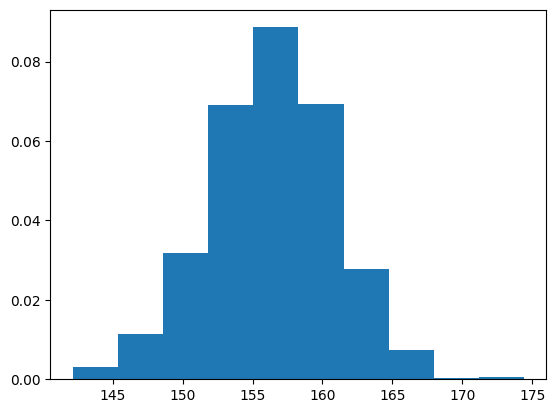

In [7]:
## 1. Vẽ hàm mật độ phân phối - PDF (Probability Density Function)
plt.hist(data_normal, density = True)
plt.show()

In [8]:
## Quan sát dữ liệu
pd.Series(data_normal).describe()
## Có ít nhất 25% người cao dưới 153 cm
## Có ít nhất 75% người cao trên 159 cm
## Có ít nhất 50% người cao trên dưới 156 cm

count    1000.000000
mean      156.378537
std         4.514877
min       142.152684
25%       153.439262
50%       156.389946
75%       159.438395
max       174.409572
dtype: float64

In [9]:
## 2. Tính xác suất của 1 người có chiều cao 160cm: P(X = 160)
x = 160
stats.norm.pdf(x, mu, sigma)

0.06165477083447822

In [10]:
## 3. Tính xác suất của 1 người có chiều cao <= 150 cm: P(X <= 150) = F(150)
x = 150
stats.norm.cdf(x, mu, sigma)

0.08885716269008848

In [11]:
## 4. Tính xác suất của 1 người có chiều cao >= 165 cm: P(X >= 165) = 1 - P(X < 165) = 1 - P(X <= 165) = 1 - F(165)
x = 165
1 - stats.norm.cdf(x, mu, sigma)

0.02787124331787172

In [12]:
## 5. Tính xác suất của 1 người có chiều cao từ 150 cm đến 165 cm: P(150 <= X <= 165) = F(165) - F(150)
stats.norm.cdf(165, mu, sigma) - stats.norm.cdf(150, mu, sigma)

0.8832715939920398

In [13]:
## 6. Hiển thị chiều cao theo các giới hạn: 1, 2 và 3 Sigma.
a, b = mu - (1 * sigma), mu + (1 * sigma)
print('1 sigma: chiều cao từ', round(a), 'cm đến', round(b), 'cm')

a, b = mu - (2 * sigma), mu + (2 * sigma)
print('2 sigma: chiều cao từ', round(a), 'cm đến', round(b), 'cm')

a, b = mu - (3 * sigma), mu + (3 * sigma)
print('3 sigma: chiều cao từ', round(a), 'cm đến', round(b), 'cm')

1 sigma: chiều cao từ 152 cm đến 161 cm
2 sigma: chiều cao từ 147 cm đến 165 cm
3 sigma: chiều cao từ 142 cm đến 170 cm


In [14]:
## Kiểm chứng lại tỷ lệ % quan sát
a, b = mu - (1 * sigma), mu + (1 * sigma)
print('Chiếu cao từ',round(a),'đến',round(b),'có',
      round((stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma))*100,2),'% các quan sát')

a, b = mu - (2 * sigma), mu + (2 * sigma)
print('Chiếu cao từ',round(a),'đến',round(b),'có',
      round((stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma))*100,2),'% các quan sát')

a, b = mu - (3 * sigma), mu + (3 * sigma)
print('Chiếu cao từ',round(a),'đến',round(b),'có',
      round((stats.norm.cdf(b, mu, sigma) - stats.norm.cdf(a, mu, sigma))*100,2),'% các quan sát')

Chiếu cao từ 152 đến 161 có 68.27 % các quan sát
Chiếu cao từ 147 đến 165 có 95.45 % các quan sát
Chiếu cao từ 142 đến 170 có 99.73 % các quan sát


---
## **Yêu cầu 2:**
- Tính các giá trị trung bình, trung vị và độ lệch chuẩn.
- Vẽ biểu đồ histogram và biểu đồ KDE.
---



In [15]:
## Trung bình, trung vị và độ lệch chuẩn
np.mean(data_normal), np.median(data_normal), np.std(data_normal)

(156.37853739033415, 156.38994590879838, 4.5126190160881725)

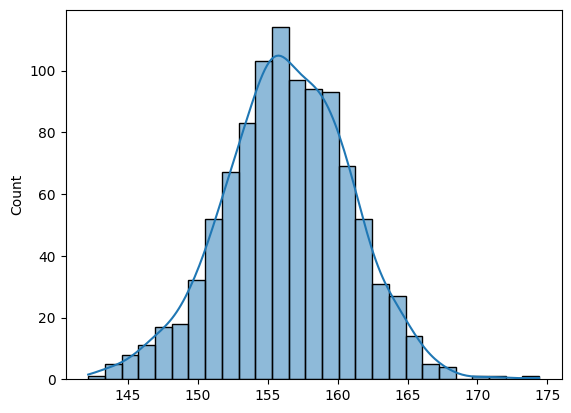

In [16]:
## Vẽ biểu đồ histogram và biểu đồ KDE
sns.histplot(data = data_normal, kde = True)
plt.show()

---
## **Yêu cầu 3:**
1. Chuyển số liệu về <b>phân phối chuẩn tắc Z</b>.
2. Vẽ biểu đồ histogram và biểu đồ KDE.
3. Tính z-score của người có chiều cao 150cm.
4. Tính z-score của người có chiều cao 175cm.
5. Tính xác suất của người có chiều cao từ 150cm đến 165cm.
6. Kiểm tra quy tắc thực nghiệm.
7. Phát hiện dữ liệu bất thường (outliers).
---



In [17]:
## 1. Chuyển số liệu về phân phối chuẩn tắc Z
data_z = stats.zscore(data_normal) # mean = 0, std = 1
data_z[:5]

array([ 1.61623466, -0.66316631, -0.57796314, -1.13330929,  0.84260109])

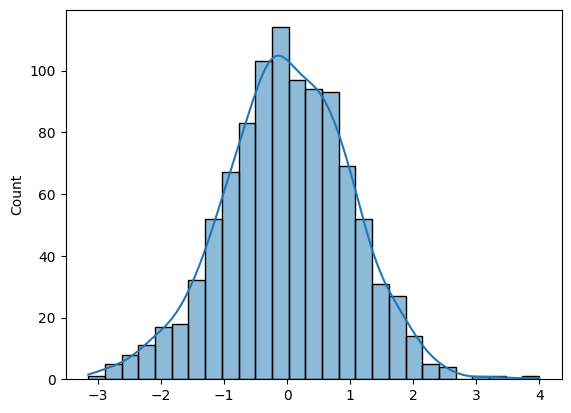

In [18]:
## 2. Vẽ biểu đồ histogram và biểu đồ KDE
sns.histplot(data = data_z, kde = True)
plt.show()

In [19]:
## 3. Tính z-score của người có chiều cao 150cm
z_150 = (150 - mu) / sigma
z_150
## Thấp hơn chiều cao trung bình 2.5 lần std

-1.3478260869565193

In [20]:
## 4. Tính z-score của người có chiều cao 175cm
z_175 = (175 - mu) / sigma
z_175
## Cao hơn chiều cao trung bình 1.6 lần std

4.0869565217391335

In [21]:
## 5. Tính xác suất của người có chiều cao từ 150cm đến 165cm.
z_150 = (150 - mu) / sigma
z_165 = (165 - mu) / sigma
stats.norm.cdf(z_165) - stats.norm.cdf(z_150)

0.8832715939920398

In [22]:
## 6. Kiểm tra quy tắc thực nghiệm
print('Với (-1 <= z <= 1):', round((stats.norm.cdf(1) - stats.norm.cdf(-1))*100, 2), '%', 'dữ liệu.')
print('Với (-2 <= z <= 2):', round((stats.norm.cdf(2) - stats.norm.cdf(-2))*100, 2), '%', 'dữ liệu.')
print('Với (-3 <= z <= 3):', round((stats.norm.cdf(3) - stats.norm.cdf(-3))*100, 2), '%', 'dữ liệu.')

Với (-1 <= z <= 1): 68.27 % dữ liệu.
Với (-2 <= z <= 2): 95.45 % dữ liệu.
Với (-3 <= z <= 3): 99.73 % dữ liệu.


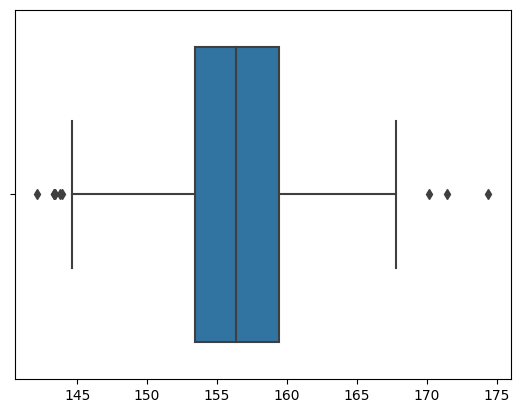

In [23]:
## 7. Phát hiện dữ liệu bất thường(outliers) dựa trên Boxplot
sns.boxplot(x = data_normal)
plt.show()

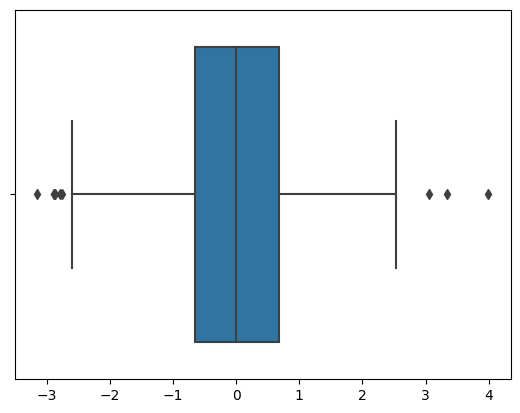

In [24]:
## Kiểm chứng trên z-score
sns.boxplot(x = data_z)
plt.show()

In [25]:
## Tính toán trên giá trị
df = pd.DataFrame({'score':data_normal, 'z_score':data_z})

r = 2.8
outliers = df[(df['z_score'] <= -r) | (df['z_score'] >= r)]
outliers.sort_values(by='score')

,score,z_score
892,142.152684,-3.152461
252,143.351809,-2.886733
661,143.361417,-2.884604
367,143.400341,-2.875979
314,170.141943,3.049982
732,171.476962,3.345823
565,174.409572,3.995692
